<a href="https://colab.research.google.com/github/vk18mishra/Multilingual-Landscaping-in-Dortmund-Nordstadt/blob/main/RMEL_Project_Landscaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multilingual Landscaping for RMEL**

## **Installing unavailable packages**

In [ ]:
!pip install tqdm
!pip install easyocr opencv-python
!pip uninstall opencv-python-headless==4.5.5.62
!pip install opencv-python-headless==4.5.2.52

## **Importing required libraries**

In [2]:
import os
from tqdm import tqdm
from os import listdir
from os.path import isfile, join
from easyocr import Reader
import argparse
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math
import pandas as pd
import numpy as np

## **Getting Image Names from the directory**

In [3]:
onlyfiles = [f for f in listdir("/content/drive/MyDrive/RMEL PROJECT") if isfile(join("/content/drive/MyDrive/RMEL PROJECT", f))]
print("Total Number of Images: ",len(onlyfiles))

Total Number of Images:  89


## **Resizing the Images to 1280x720 and compressing them**

In [4]:
for img_name in tqdm(onlyfiles):
  image_nm = "/content/drive/MyDrive/RMEL PROJECT/"+img_name
  foo = Image.open(image_nm)
  x, y = foo.size
  #print("Original File Size: ",os.stat("/content/drive/MyDrive/RMEL PROJECT/IMG_20220128_173721.jpg").st_size)
  #print(x,y)
  x2, y2 = 1280,720 #math.floor(x-2500), math.floor(y-2000)
  #print(x2,y2)
  foo = foo.resize((x2,y2),Image.ANTIALIAS)
  image_dest = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+img_name
  foo.save(image_dest,quality=40)
  #print("Compressed File Size: ",os.stat("/content/drive/MyDrive/RMEL PROJECT/Compressed/IMG_20220128_173721.jpg").st_size)

100%|██████████| 89/89 [01:44<00:00,  1.17s/it]


## **Performing OCR on the Compressed Images**

In [5]:
#langs = "de,ar,tr,en"
langs1 = ["en","tr","de"]#langs.split(",")
print("[INFO] Using the following languages: {}".format(langs1))
print("[INFO] Performing OCR on the input Images...")
reader1 = Reader(langs1, gpu=True)
results1 = []
for img_name in tqdm(onlyfiles):
  image_nm = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+img_name
  #image = "/content/drive/MyDrive/RMEL PROJECT/Compressed/IMG_20220128_173721.jpg"

  #langs2 = ["ar"]
  #langs = ["en","tr","de","ar"]
  image = cv2.imread(image_nm)
  #reader2 = Reader(langs2, gpu=False)
  results_temp = reader1.readtext(image)
  results1.append(results_temp)
  #results2 = reader2.readtext(image)

[INFO] Using the following languages: ['en', 'tr', 'de']
[INFO] Performing OCR on the input Images...


100%|██████████| 89/89 [00:40<00:00,  2.19it/s]


## **Removing Noise and Creating the Final Dataframe - Image to Text**

### **Converting everything to lower-case and removing any text that contains digits, special characters or Redmi's watermark**

In [6]:
lowecase_text = []
main_list_text = []
special_characters = "\"!@#$%^&*()-+?_=,<>\""
for img_fn in tqdm(results1):
  list_text = []
  for (bbox, text, prob) in img_fn:
    text_t = text.lower()
    digit_bool = any(i.isdigit() for i in text_t)
    if digit_bool == True:
      continue
    if any(c in special_characters for c in text_t):
      continue
    if(text_t in ["al quad camera", "redmi", "note",
                "pro", "redm", "al quad gamera", "ai", "quad", "alquad camera" 
                "camera", "quadcamera", "al quadcamera"]):
      continue  
    list_text.append(text_t)
  lowecase_text.append(list_text)
main_list_text = lowecase_text

100%|██████████| 89/89 [00:00<00:00, 13622.34it/s]


In [7]:
df1 = {
  'Image Name':onlyfiles,
  'Text':main_list_text}

df1 = pd.DataFrame(df1,columns=['Image Name','Text'])

df1.head()

,Image Name,Text
0,IMG_20220128_174011.jpg,[]
1,IMG_20220128_173838.jpg,"[döner, grill, salate, iaglicm hausgemachter, ..."
2,IMG_20220128_173721.jpg,"[s, caglar, damen, herren, salom, p, en]"
3,IMG_20220128_173405.jpg,"[ourfaci, rusumcu, al quadiiiamera, ourfali, a..."
4,IMG_20220128_173346.jpg,"[konyelıfş, fralslerladen, pelhe, fut]"


## **Saving the results in a CSV**

In [ ]:
df1.to_csv('ImagetoText_updated.csv')

## **Working Example**

In [25]:
img_name = onlyfiles[37]
image_nm = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+img_name
image = cv2.imread(image_nm)
results_temp = reader1.readtext(image)

[INFO] 0.333487: TRRURiNGe
[INFO] 0.138377: Flingolo
[INFO] 0.204811: Ohrainge
[INFO] 0.032161: AkeaeanDer
[INFO] 0.389311: BRILLANTEN
[INFO] 0.659641: REPARATUR SERVICE
[INFO] 0.916694: AN- & VERKAUF
[INFO] 0.655129: G
[INFO] 0.602369: sal
[INFO] 0.377130: 49
[INFO] 0.990880: Wasserschaden
[INFO] 0.731159: Smartphones Handys
[INFO] 0.934297: Displayschaden, Akkuschäden
[INFO] 0.676073: Zubehör aller Art: Panzerfolie; Hullen
[INFO] 0.420006: Smartphoncs Handys
[INFO] 0.216776: ReDMI note 8 PRO
[INFO] 0.622169: AI QUAD CAMERA
[INFO] 0.066058: Ge


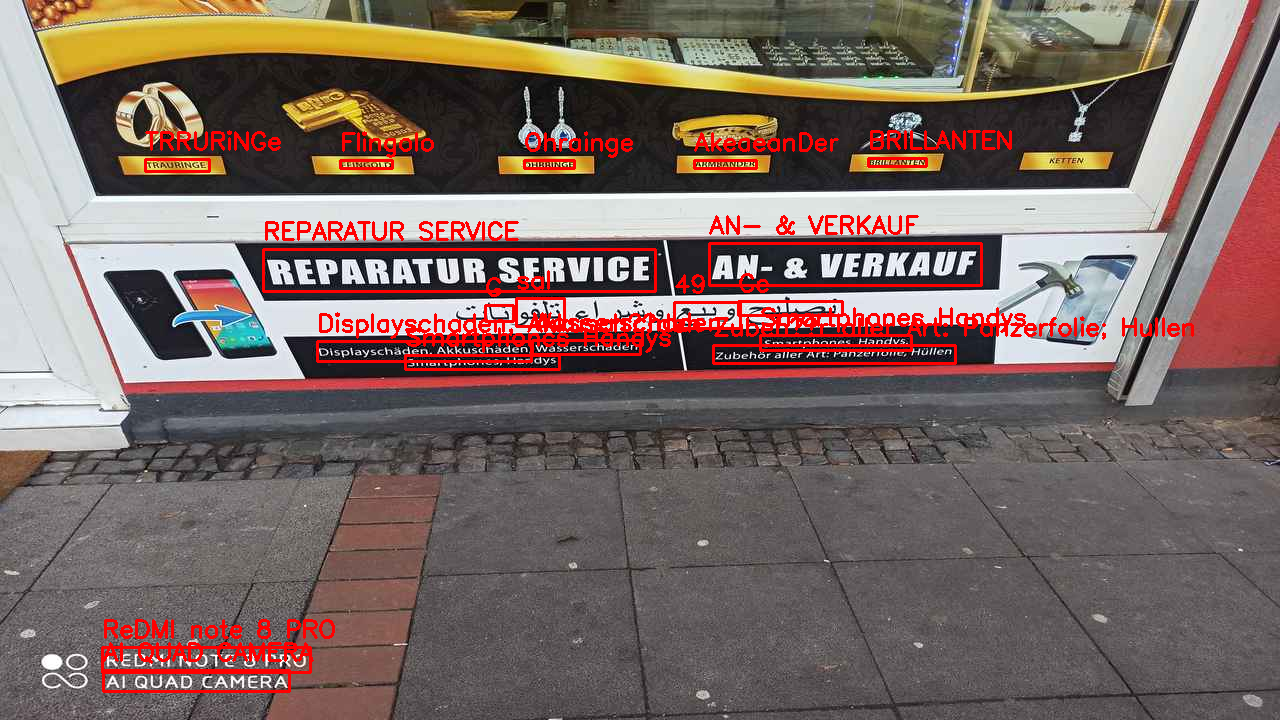

In [26]:
for (bbox, text, prob) in results_temp:
  print("[INFO] {:4f}: {}".format(prob,text))
  (top_left, top_right, bottom_right, bottom_left) = bbox

  tl = (int(top_left[0]), int(top_left[1]))
  tr = (int(top_right[0]), int(top_right[1]))
  br = (int(bottom_right[0]), int(bottom_right[1]))
  bl = (int(bottom_left[0]), int(bottom_left[1]))

  cv2.rectangle(image, tl, br, (0, 0, 255), 2)
  cv2.putText(image, text, (tl[0], tl[1] - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# image_nm = "/content/drive/MyDrive/RMEL PROJECT/Compressed/"+onlyfiles[88]
# image = cv2.imread(image_nm)
cv2_imshow(image)
#cv2.waitKey(0)

In [27]:
list_text = []
special_characters = "\"!@#$%^&*()-+?_=,<>\""
for (bbox, text, prob) in results_temp:
    text_t = text.lower()
    digit_bool = any(i.isdigit() for i in text_t)
    if digit_bool == True:
      continue
    if any(c in special_characters for c in text_t):
      continue
    if(text_t in ["al quad camera", "redmi", "note",
                "pro", "redm", "al quad gamera", "ai", "quad", "alquad camera" 
                "camera", "quadcamera", "al quadcamera"]):
      continue  
    list_text.append(text_t)

df_temp = {
  'Image Name':onlyfiles[24],
  'Text':list_text}

df_temp = pd.DataFrame(df_temp,columns=['Image Name','Text'])

df_temp

,Image Name,Text
0,IMG_20220128_162302.jpg,trruringe
1,IMG_20220128_162302.jpg,flingolo
2,IMG_20220128_162302.jpg,ohrainge
3,IMG_20220128_162302.jpg,akeaeander
4,IMG_20220128_162302.jpg,brillanten
5,IMG_20220128_162302.jpg,reparatur service
6,IMG_20220128_162302.jpg,g
7,IMG_20220128_162302.jpg,sal
8,IMG_20220128_162302.jpg,wasserschaden
9,IMG_20220128_162302.jpg,smartphones handys


## **Performing Analysis on the data obtained**

In [ ]:
!pip install langdetect

In [29]:
from langdetect import detect
import matplotlib.pyplot as plt

### **Finding the language of each text detected**

In [30]:
langs = []
dict_lang = dict()
for img_wd in tqdm(main_list_text):
  if not img_wd:
    continue
  for word in img_wd:
    # b = TextBlob(word)
    # print(word)
    try:
      lang_wd = detect(word)
    except:
        lang_wd = "error"
        print("This word throws error:", word)
    #langs.append(lang_wd)
    if lang_wd not in dict_lang:
      dict_lang[lang_wd] = 1
    else:
      dict_lang[lang_wd] = dict_lang[lang_wd] + 1
# langs_set = set(langs)
# print(langs_set)

 13%|█▎        | 12/89 [00:02<00:11,  6.89it/s]

This word throws error: 


 40%|████      | 36/89 [00:06<00:06,  8.50it/s]

This word throws error: '


 55%|█████▌    | 49/89 [00:07<00:03, 12.17it/s]

This word throws error: :


 90%|████████▉ | 80/89 [00:10<00:00, 11.60it/s]

This word throws error: 


100%|██████████| 89/89 [00:11<00:00,  7.53it/s]

This word throws error: ~
This word throws error: 


### **Sorting according to the frequency of the language**

In [68]:
dict_lang_t = sorted(dict_lang.items(), key=lambda x: x[1], reverse=True)
lang_list_sort = []
freq_sort = []
for lang in dict_lang_t:
    lang_list_sort_t = lang[0]
    freq_sort_t = lang[1]
    lang_list_sort.append(lang_list_sort_t)
    freq_sort.append(freq_sort_t)

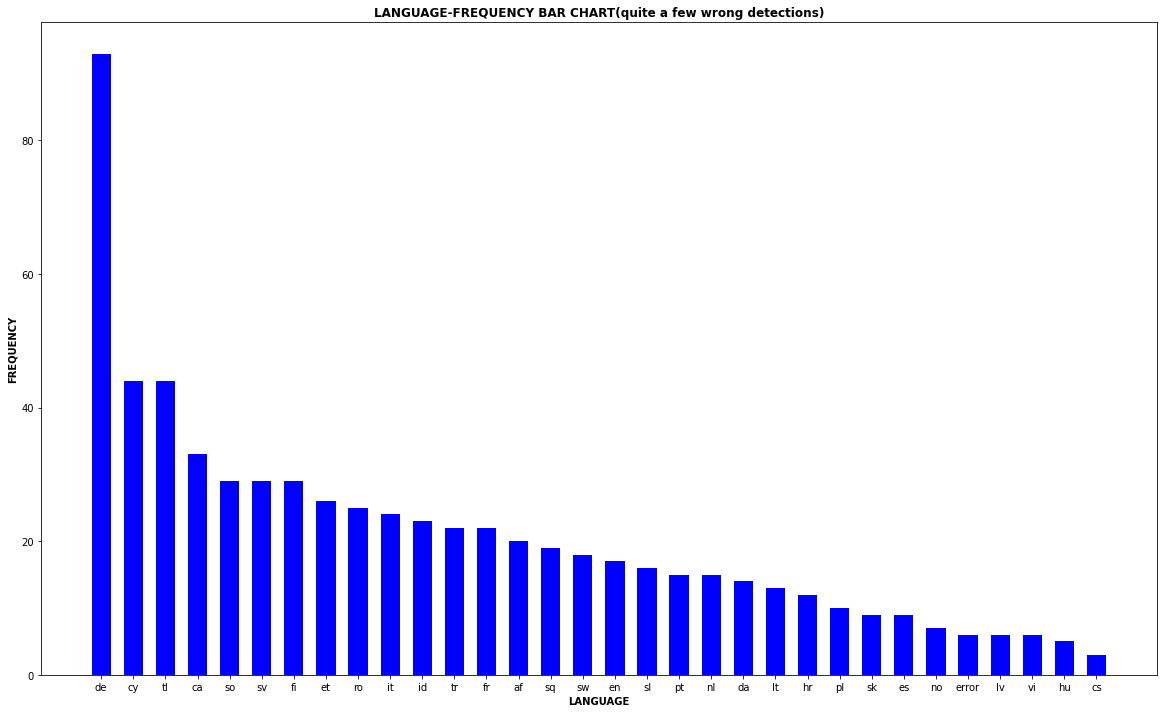

In [76]:
width = 1.0
plt.figure(figsize=(20,12))
plt.bar(lang_list_sort, freq_sort, align='center', width=0.6, color='b')
plt.xlabel("LANGUAGE", weight='bold')
plt.ylabel("FREQUENCY", weight='bold')
plt.title("LANGUAGE-FREQUENCY BAR CHART(quite a few wrong detections)", weight='bold')
plt.show()

### **Restricting ourselves to just the languages we performed OCR upon**

In [77]:
lang_list_sort = []
freq_sort = []
for lang in dict_lang_t:
    lang_list_sort_t = lang[0]
    if lang_list_sort_t not in ['de', 'tr', 'en', 'error']:
      continue
    freq_sort_t = lang[1]
    lang_list_sort.append(lang_list_sort_t)
    freq_sort.append(freq_sort_t)

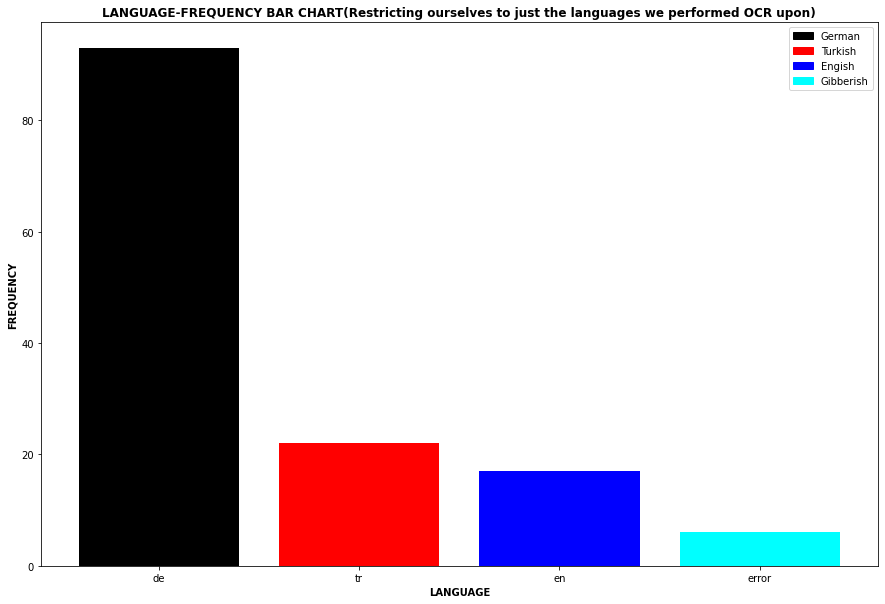

In [78]:
width = 1.0
colors = {'German':'black', 'Turkish':'red', 'Engish':'blue', 'Gibberish':'cyan'}         
labels = ['German', 'Turkish', 'Engish', 'Gibberish']
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.figure(figsize=(15,10))
plt.bar(lang_list_sort, freq_sort, align='center', width=0.8, color=['black', 'red', 'blue', 'cyan'])
plt.xlabel("LANGUAGE", weight='bold')
plt.ylabel("FREQUENCY", weight='bold')
plt.title("LANGUAGE-FREQUENCY BAR CHART(Restricting ourselves to just the languages we performed OCR upon)", weight='bold')
plt.legend(handles, labels)
plt.show()